In [1]:
library(readxl)

In [2]:
GDP <- read_excel("dataset.xlsx",sheet = "GDP")
IGI <- read_excel("dataset.xlsx",sheet = "IGI")
GINI <- read_excel("dataset.xlsx",sheet = "GINI")
SPI <- read_excel("dataset.xlsx",sheet = "SPI")
DEMC <- read_excel("dataset.xlsx",sheet = "Democracy_Index")

In [3]:
head(GDP)
head(IGI)
head(GINI)
head(SPI)
head(DEMC)

Country,GDP_PC_PPP,GDP_Year
<chr>,<dbl>,<dbl>
Burundi,793,2021
Central African Republic,1021,2021
DR Congo,1219,2021
South Sudan,1235,2015
Somalia,1303,2021
Niger,1310,2021


Country,IGI_SCORE
<chr>,<dbl>
Sudan,10.20000
Eswatini,10.29000
DR Congo,11.26000
Djibouti,11.45000
Guinea,11.57500
Iraq,11.90994


Country,GINI_SCORE,GINI_YEAR
<chr>,<dbl>,<dbl>
Albania,30.8,2019
Algeria,27.6,2011
Angola,51.3,2018
Argentina,42.3,2020
Armenia,25.2,2020
Australia,34.3,2018


Country,SPI_SCORE
<chr>,<dbl>
Norway,92.63
Finland,92.26
Denmark,92.15
Iceland,91.78
Switzerland,91.78
Canada,91.41


Country,DEMC_SCORE
<chr>,<dbl>
Afghanistan,0.32
Myanmar,1.02
North Korea,1.08
DR Congo,1.40
Central African Republic,1.43
Syria,1.43


In [4]:
GDP$GDP <- log(GDP$GDP_PC_PPP)


GDP["GDP_PC_PPP"]<- NULL

In [5]:
df <- merge(GDP, IGI, by = "Country", all = FALSE)
df <- merge(df, GINI, by = "Country", all = FALSE)
df <- merge(df, SPI, by = "Country", all = FALSE)
df <- merge(df, DEMC, by = "Country", all = FALSE)

df[c("GDP_Year","GINI_YEAR")]<- NULL

In [6]:
head(df)


,Country,GDP,IGI_SCORE,GINI_SCORE,SPI_SCORE,DEMC_SCORE
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,9.657971,24.44116,30.8,74.51,6.11
2,Algeria,9.395824,16.69632,27.6,67.04,3.77
3,Angola,8.791942,13.92051,51.3,47.23,3.37
4,Argentina,10.070145,28.62314,42.3,80.38,6.81
5,Armenia,9.590829,26.59153,25.2,74.56,5.49
6,Australia,10.929655,47.13753,34.3,90.28,8.90


In [7]:
colnames(df)[colnames(df) == "IGI_SCORE"] <- "IGI"
colnames(df)[colnames(df) == "GINI_SCORE"] <- "GINI"
colnames(df)[colnames(df) == "SPI_SCORE"] <- "SPI"
colnames(df)[colnames(df) == "DEMC_SCORE"] <- "DEMC"

df$DEMC <- df$DEMC*10

head(df)

,Country,GDP,IGI,GINI,SPI,DEMC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,9.657971,24.44116,30.8,74.51,61.1
2,Algeria,9.395824,16.69632,27.6,67.04,37.7
3,Angola,8.791942,13.92051,51.3,47.23,33.7
4,Argentina,10.070145,28.62314,42.3,80.38,68.1
5,Armenia,9.590829,26.59153,25.2,74.56,54.9
6,Australia,10.929655,47.13753,34.3,90.28,89.0


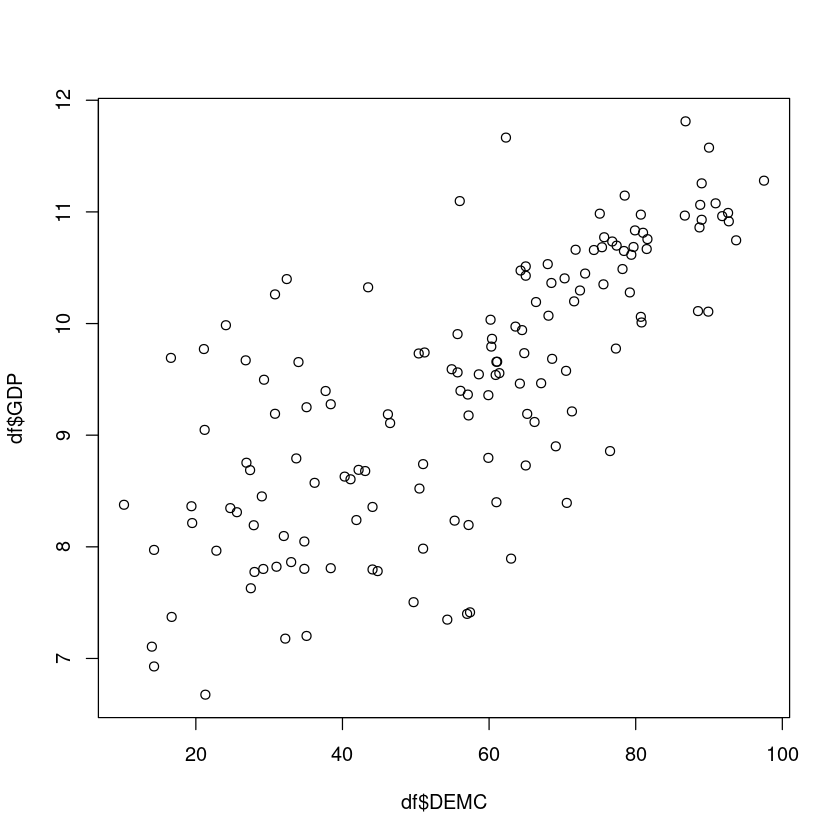

In [8]:
plot(df$DEMC,df$GDP)

In [9]:
library(psych)

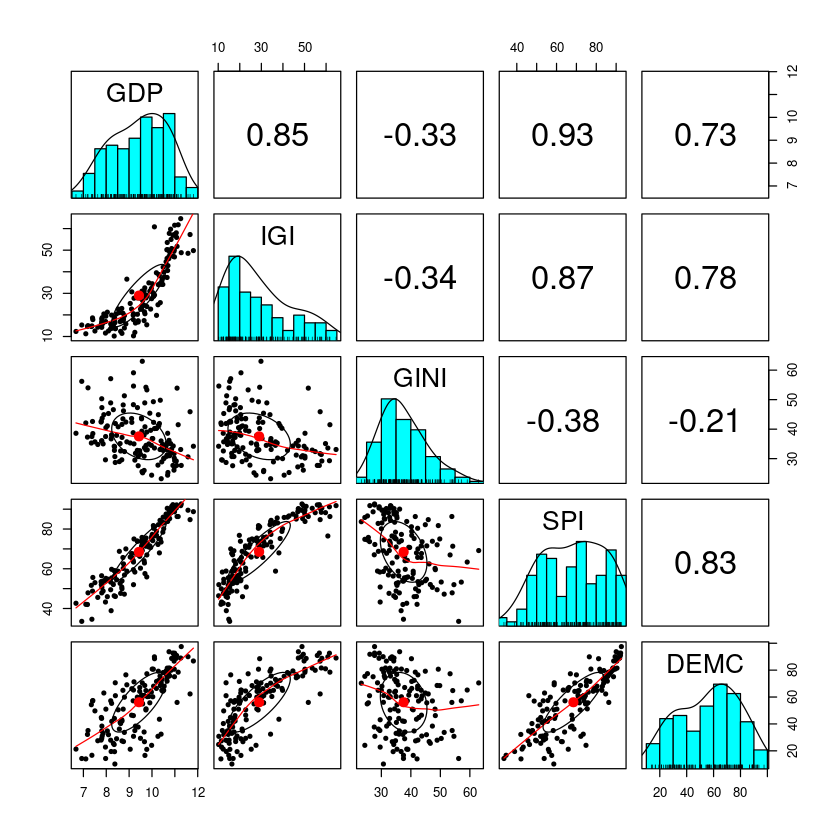

In [10]:
pairs.panels(df[-1],
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
                )

In [11]:
fit <- lm(GDP ~ SPI+DEMC+GINI+IGI, data = df)

In [12]:
library(stargazer)
stargazer(fit, type="text",report=('vc*p'))


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





                        Dependent variable:    
                    ---------------------------
                                GDP            
-----------------------------------------------
SPI                          0.072***          
                             p = 0.000         
                                               
DEMC                         -0.009***         
                             p = 0.002         
                                               
GINI                           0.007           
                             p = 0.161         
                                               
IGI                          0.016***          
                             p = 0.003         
                                               
Constant                     4.292***          
                             p = 0.000         
                                               
-----------------------------------------------
Observations                    145    

In [13]:
library(lmtest)
library(tseries)
library(car)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit




In [14]:
resettest(fit)


	RESET test

data:  fit
RESET = 1.177, df1 = 2, df2 = 138, p-value = 0.3113


In [15]:
bptest(fit)


	studentized Breusch-Pagan test

data:  fit
BP = 26.102, df = 4, p-value = 3.019e-05


In [16]:
jarque.bera.test(residuals(fit))


	Jarque Bera Test

data:  residuals(fit)
X-squared = 2.0415, df = 2, p-value = 0.3603


In [17]:
dwtest(fit)


	Durbin-Watson test

data:  fit
DW = 1.8473, p-value = 0.177
alternative hypothesis: true autocorrelation is greater than 0


In [18]:
fit_wt <- lm(GDP ~ DEMC+GINI+IGI, data = df, weights = 1/(GINI))

In [19]:
stargazer(fit,fit_wt, type="text",report=('vc*p'))


                                   Dependent variable:               
                    -------------------------------------------------
                                           GDP                       
                              (1)                      (2)           
---------------------------------------------------------------------
SPI                         0.072***                                 
                           p = 0.000                                 
                                                                     
DEMC                       -0.009***                 0.009**         
                           p = 0.002                p = 0.019        
                                                                     
GINI                         0.007                   -0.014*         
                           p = 0.161                p = 0.052        
                                                                     
IGI                

In [20]:
bptest(fit_wt)


	studentized Breusch-Pagan test

data:  fit_wt
BP = 10.58, df = 3, p-value = 0.01423


In [21]:
sigmaU <- summary(fit_wt)$sigma


In [22]:
t <- qt(0.10/2,141, lower.tail = F)

In [23]:
Confidence_Levels <- data.frame(fit_wt$coefficients)

In [24]:
colnames(Confidence_Levels) <- c('Beta')

In [25]:
for (i in 2:4){
  Confidence_Levels[i,'Lim_inf'] <- Confidence_Levels[i,1]-t*sigmaU*Confidence_Levels[i,1]
  Confidence_Levels[i,'Lim_sup'] <- Confidence_Levels[i,1]+t*sigmaU*Confidence_Levels[i,1]
}

In [26]:
Confidence_Levels[-1,c(2,1,3)]

,Lim_inf,Beta,Lim_sup
,<dbl>,<dbl>,<dbl>
DEMC,0.007354154,0.008813611,0.01027307
GINI,-0.011728229,-0.014055736,-0.01638324
IGI,0.046544230,0.055781092,0.06501795


In [27]:
library(xtable)
print(xtable(Confidence_Levels[-1,c(2,1,3)], digits=3))

% latex table generated in R 4.2.2 by xtable 1.8-4 package
% Thu Dec  1 20:06:51 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrr}
  \hline
 & Lim\_inf & Beta & Lim\_sup \\ 
  \hline
DEMC & 0.007 & 0.009 & 0.010 \\ 
  GINI & -0.012 & -0.014 & -0.016 \\ 
  IGI & 0.047 & 0.056 & 0.065 \\ 
   \hline
\end{tabular}
\end{table}


In [28]:
df$GDP_ESTIM <- predict(fit_wt, df)

In [29]:
head(df)

,Country,GDP,IGI,GINI,SPI,DEMC,GDP_ESTIM
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,9.657971,24.44116,30.8,74.51,61.1,9.316555
2,Algeria,9.395824,16.69632,27.6,67.04,37.7,8.723279
3,Angola,8.791942,13.92051,51.3,47.23,33.7,8.200066
4,Argentina,10.070145,28.62314,42.3,80.38,68.1,9.449885
5,Armenia,9.590829,26.59153,25.2,74.56,54.9,9.460573
6,Australia,10.929655,47.13753,34.3,90.28,89.0,10.779288


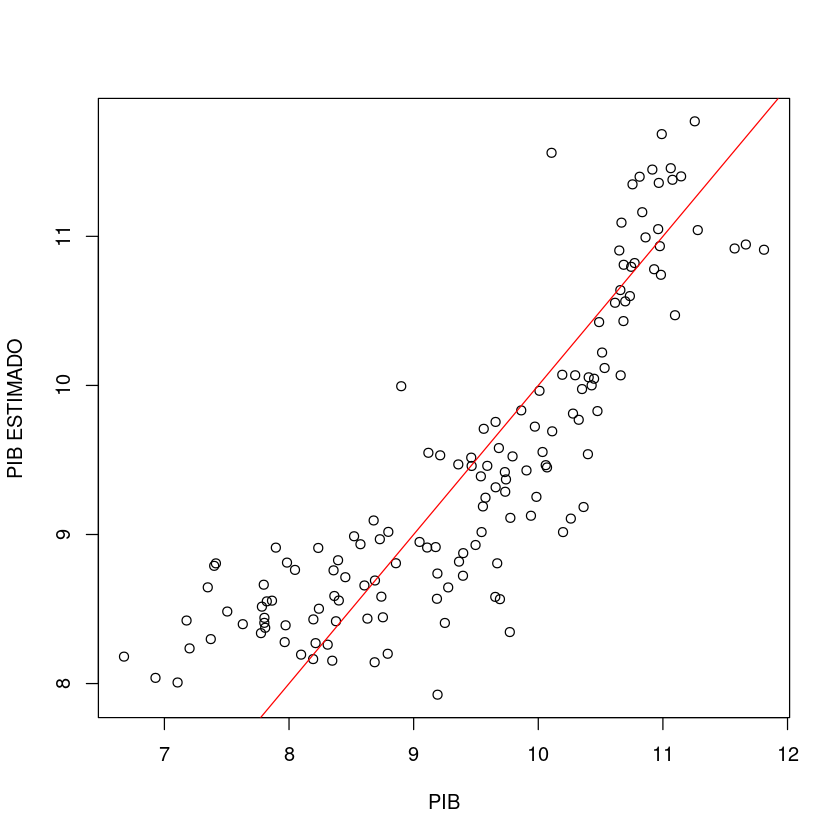

In [30]:
plot(df$GDP,df$GDP_ESTIM, xlab="PIB", ylab="PIB ESTIMADO")
abline(a=0, b=1, col = "red")

In [31]:
# create a df with 4 rows and copy the column names from the original df
df2 <- data.frame(matrix(nrow = 4, ncol = ncol(df)))
colnames(df2) <- colnames(df)


In [32]:
data.frame(Country= 'mean',GDP = mean(df$GDP), SPI = mean(df$SPI), DEMC = mean(df$DEMC), GINI = mean(df$GINI), IGI = mean(df$IGI))

Country,GDP,SPI,DEMC,GINI,IGI
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mean,9.430203,68.49821,56.13241,37.55517,28.96562


In [33]:
mean_GDP_ESTIM <- predict(fit_wt, data.frame(Country= 'mean',GDP = mean(df$GDP), IGI = mean(df$IGI), GINI = mean(df$GINI), SPI = mean(df$SPI), DEMC = mean(df$DEMC)))

In [34]:
mean_GDP_ESTIM

1 
9.430203

In [35]:
df2[1,] <- df[df$GDP==quantile(df$GDP,0.25),]
df2[2,] <- df[df$GDP==quantile(df$GDP,0.50),]
df2[3,] <- df[df$GDP==quantile(df$GDP,0.75),]
df2[4,] <- data.frame(Country= 'mean',GDP = mean(df$GDP), IGI = mean(df$IGI), GINI = mean(df$GINI), SPI = mean(df$SPI), DEMC = mean(df$DEMC), GDP_ESTIM = mean_GDP_ESTIM)

In [40]:
#add a column to df2 named QUANTILE with the values 0.25, 0.50, 0.75 and 0.00
df2$QUANTILE <- c('Q1','Median','Q3',0.00)

In [41]:
df2

Country,GDP,IGI,GINI,SPI,DEMC,GDP_ESTIM,QUANTILE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Papua New Guinea,8.399535,13.64000,41.90000,46.06000,61.00000,8.557155,Q1
Ukraine,9.562405,31.01918,25.60000,75.78000,55.70000,9.708981,Median
Croatia,10.428246,35.60324,28.90000,82.82000,65.00000,10.000267,Q3
mean,9.430203,28.96562,37.55517,68.49821,56.13241,9.430203,0


In [42]:
print(xtable(df2[c(8,1,2,7)]))

% latex table generated in R 4.2.2 by xtable 1.8-4 package
% Thu Dec  1 20:09:22 2022
\begin{table}[ht]
\centering
\begin{tabular}{rllrr}
  \hline
 & QUANTILE & Country & GDP & GDP\_ESTIM \\ 
  \hline
1 & Q1 & Papua New Guinea & 8.40 & 8.56 \\ 
  2 & Median & Ukraine & 9.56 & 9.71 \\ 
  3 & Q3 & Croatia & 10.43 & 10.00 \\ 
  4 & 0 & mean & 9.43 & 9.43 \\ 
   \hline
\end{tabular}
\end{table}
